In [139]:
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import seaborn as sns 
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint
from sklearn.model_selection import  StratifiedKFold,cross_val_score
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTENC
from matplotlib.lines import Line2D

In [140]:
data=pd.read_csv('student_performance_large_dataset_new.csv')
data.head()

,Unnamed: 0,Student_ID,Age,Gender,Study_Hours_per_Week,Preferred_Learning_Style,Online_Courses_Completed,Participation_in_Discussions,Assignment_Completion_Rate....,Exam_Score....,Attendance_Rate....,Use_of_Educational_Tech,Self_Reported_Stress_Level,Time_Spent_on_Social_Media..hours.week.,Sleep_Hours_per_Night,Final_Grade
0,1,S00001,18,Female,48,Kinesthetic,14,Yes,100,85.964060,66,Yes,High,9,8,A
1,2,S00002,29,Female,30,Reading/Writing,20,No,71,81.584196,57,Yes,Medium,28,8,B
2,3,S00003,20,Female,47,Kinesthetic,11,No,60,84.828407,79,Yes,Low,13,7,B
3,4,S00004,23,Female,13,Auditory,0,Yes,63,57.502203,60,Yes,Low,24,10,C
4,5,S00005,19,Female,24,Auditory,19,Yes,59,74.638949,93,Yes,Medium,26,8,B


In [141]:
data.columns = data.columns.str.replace(r'\.*$', '', regex=True)
cleaned_data=data.drop(columns=['Student_ID','Unnamed: 0'])



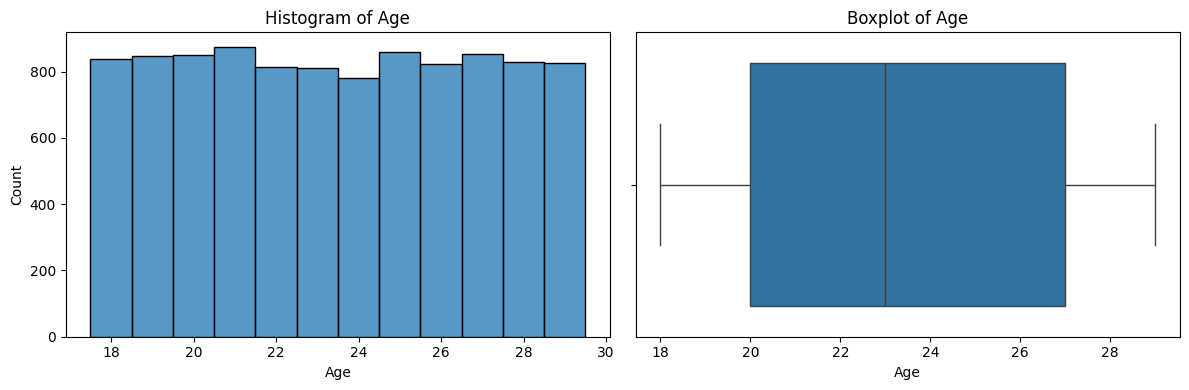

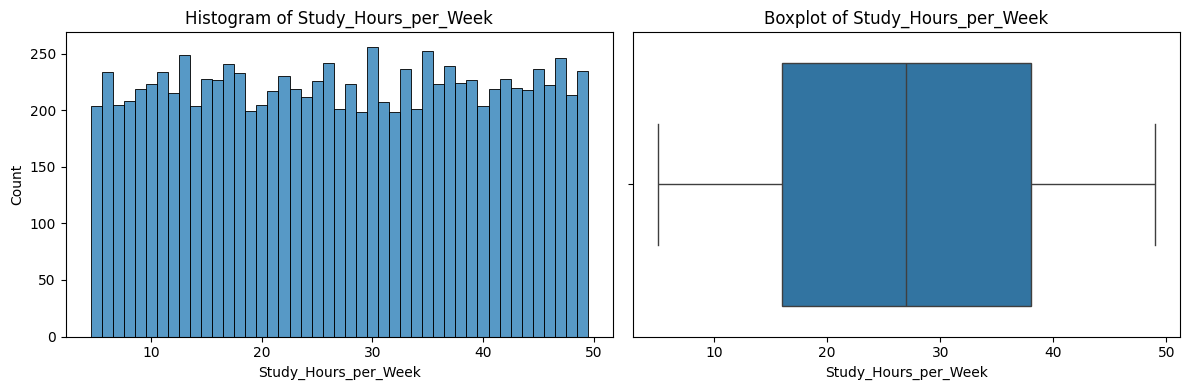

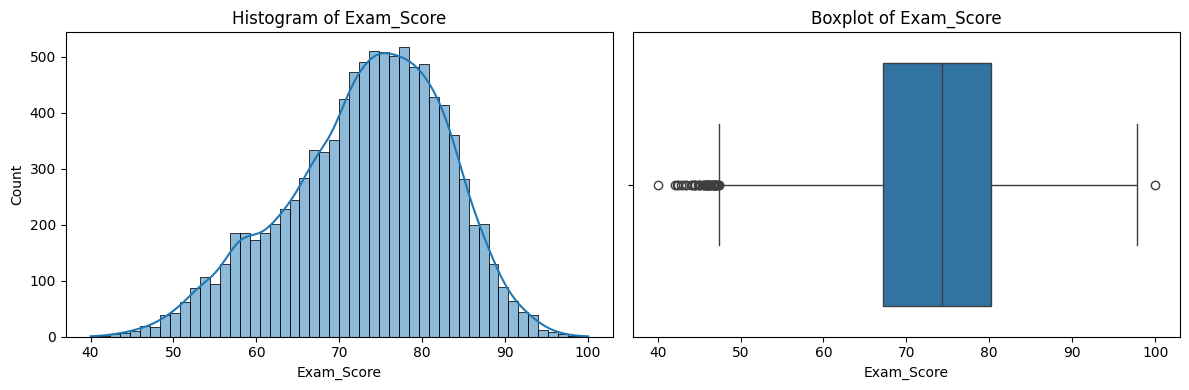

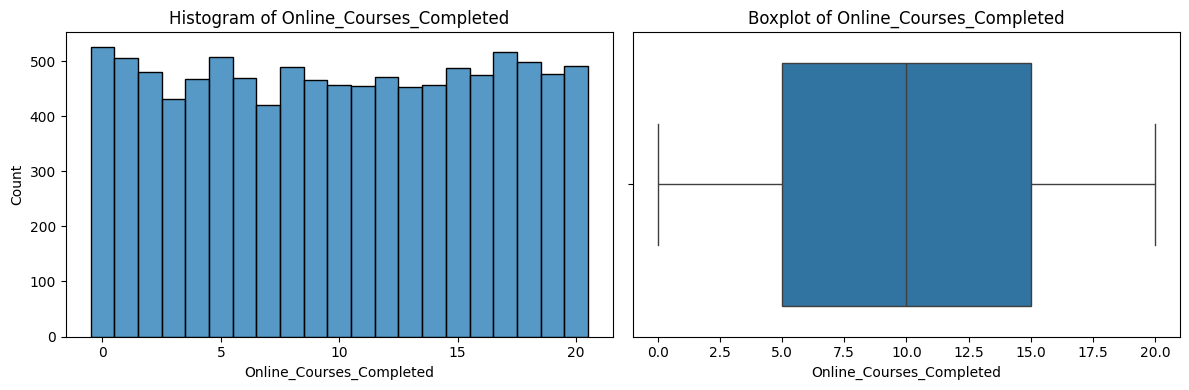

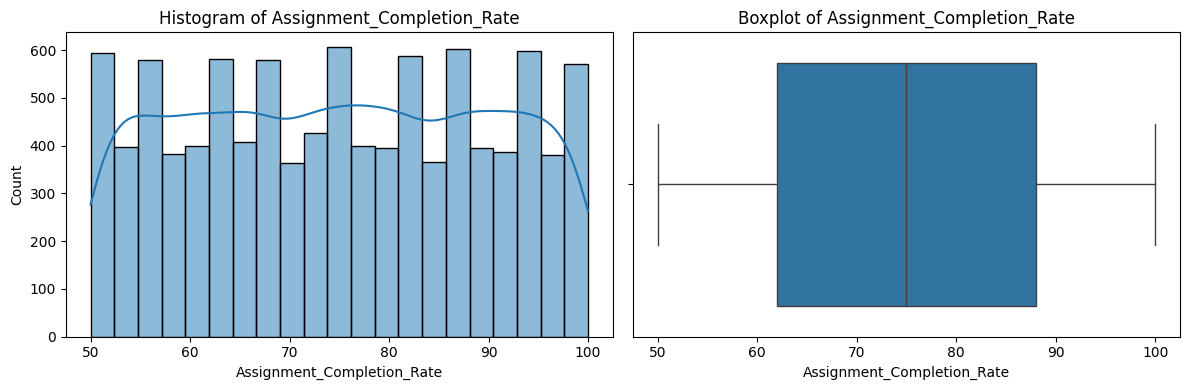

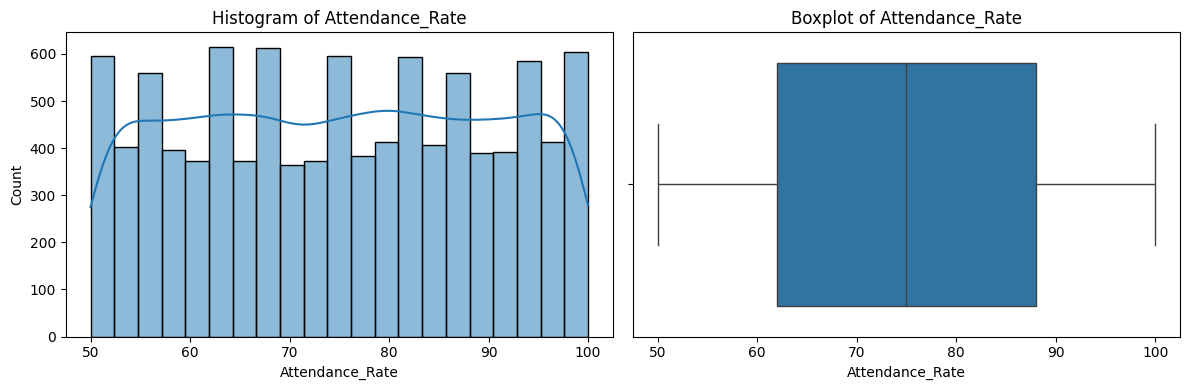

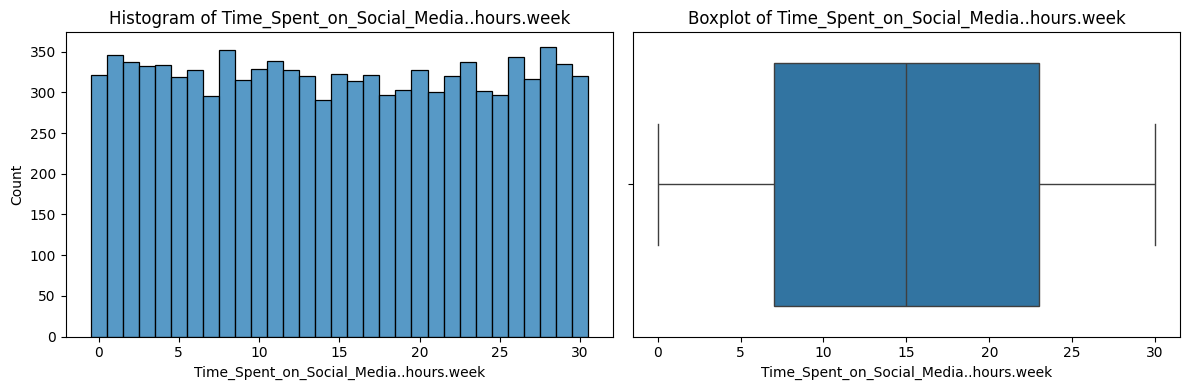

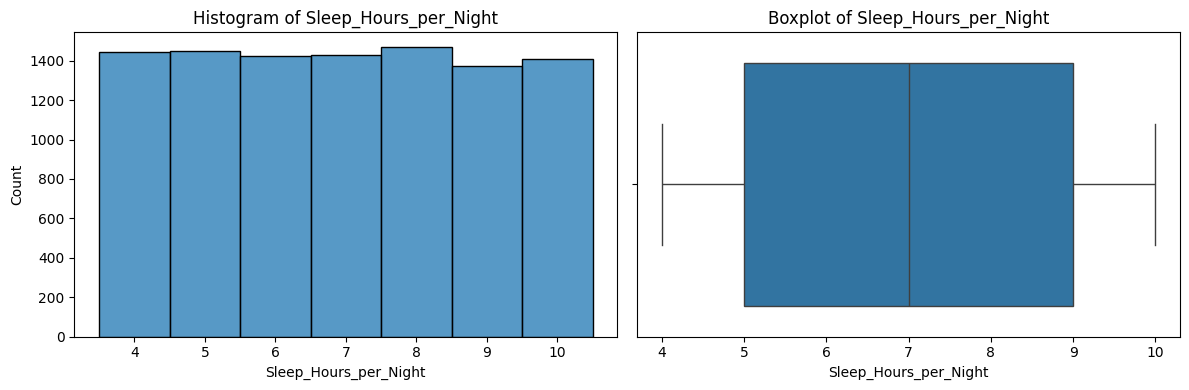

In [142]:
# List of numerical columns to analyze
numerical_cols = ['Age', 'Study_Hours_per_Week', 'Exam_Score',
                  'Online_Courses_Completed', 
                  'Assignment_Completion_Rate',
                  'Attendance_Rate',
                  'Time_Spent_on_Social_Media..hours.week',
                  'Sleep_Hours_per_Night']

# Univariate Analysis for Numerical Columns
for col in numerical_cols:
   
    # Histogram + Boxplot for continuous variables
    fig, axs = plt.subplots(1, 2, figsize=(12, 4))
    if(col in ['Online_Courses_Completed','Study_Hours_per_Week','Time_Spent_on_Social_Media..hours.week','Sleep_Hours_per_Night','Age']):
        sns.histplot(cleaned_data[col].dropna(), kde=False, bins=5, discrete=True, ax=axs[0])
    else:
        sns.histplot(cleaned_data[col].dropna(), kde=True, ax=axs[0])
    axs[0].set_title(f'Histogram of {col}')
    axs[0].set_xlabel(col)
       

    sns.boxplot(x=cleaned_data[col], ax=axs[1])
    axs[1].set_title(f'Boxplot of {col}')
    axs[1].set_xlabel(col)

    plt.tight_layout()
    plt.show()


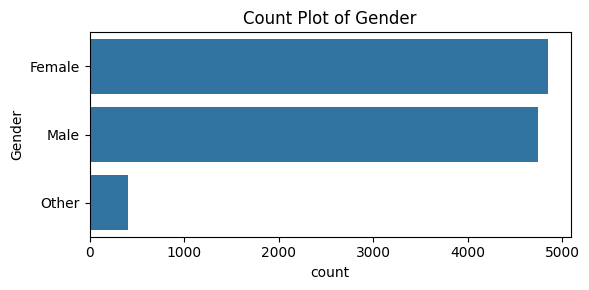

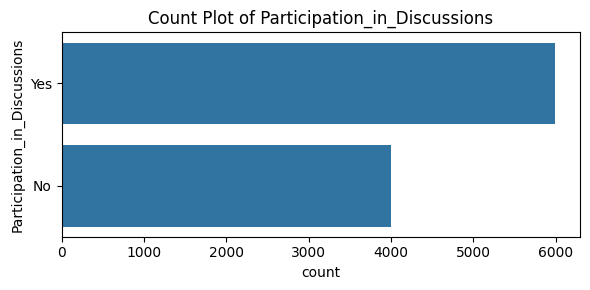

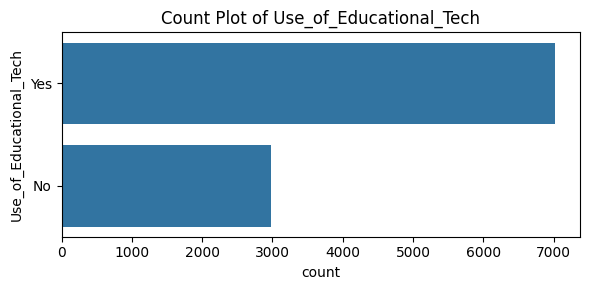

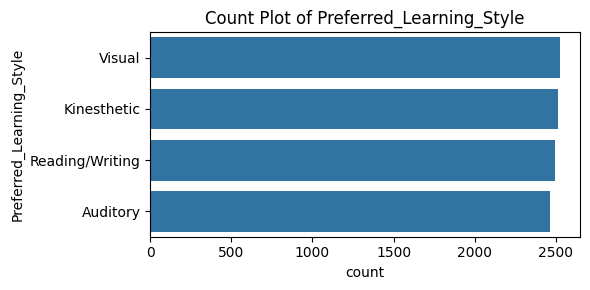

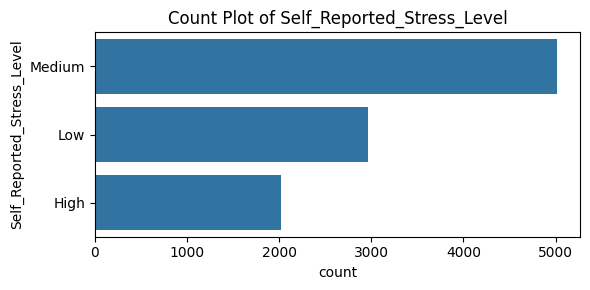

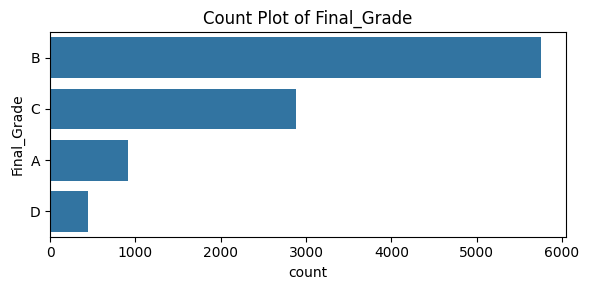

In [143]:
categorical_cols = [
    'Gender',
    'Participation_in_Discussions',
    'Use_of_Educational_Tech',
    'Preferred_Learning_Style',
    'Self_Reported_Stress_Level',
    'Final_Grade'
]
# Univariate Analysis for Categorical Columns
for col in categorical_cols:
    if(col in ['region']):
        plt.figure(figsize=(8, 6))
    else:
        plt.figure(figsize=(6, 3))
    sns.countplot(y=col, data=cleaned_data, order=cleaned_data[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.tight_layout()
    plt.show()

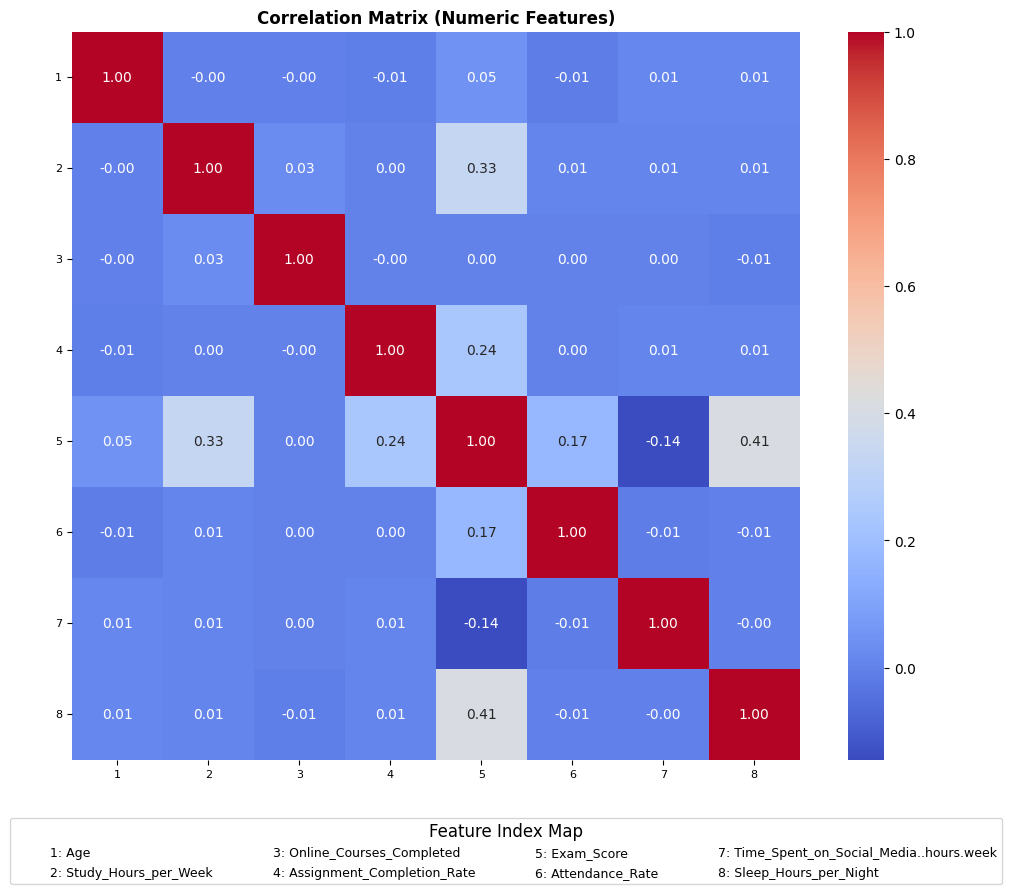

In [144]:

numeric_data = cleaned_data.select_dtypes(include='number')
corr_matrix = numeric_data.corr()

features = list(corr_matrix.columns)
feature_labels = [f"{i+1}" for i in range(len(features))]
feature_legend_labels = [f"{i+1}: {feat}" for i, feat in enumerate(features)]

corr_matrix.index = feature_labels
corr_matrix.columns = feature_labels


fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True, ax=ax)


ax.set_title("Correlation Matrix (Numeric Features)", fontsize=12, fontweight='bold')
ax.set_xticklabels(ax.get_xticklabels(), rotation=0, fontsize=8)
ax.set_yticklabels(ax.get_yticklabels(), rotation=0, fontsize=8)

fake_handles = [Line2D([0], [0], color='black', linewidth=0) for _ in feature_labels]

fig.legend(
    handles=fake_handles,
    labels=feature_legend_labels,
    loc='lower center',
    ncol=min(4, len(feature_labels)),
    fontsize=9,
    title="Feature Index Map",
    title_fontsize=12,
    frameon=True,
    bbox_to_anchor=(0.5, -0.12)
)

plt.tight_layout()
plt.show()


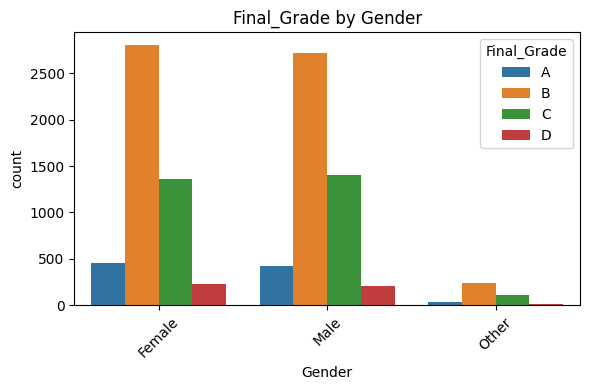

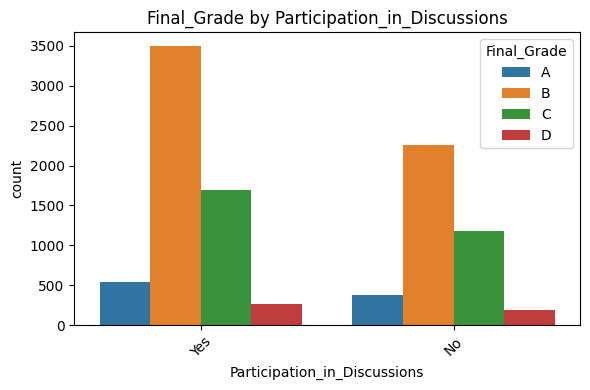

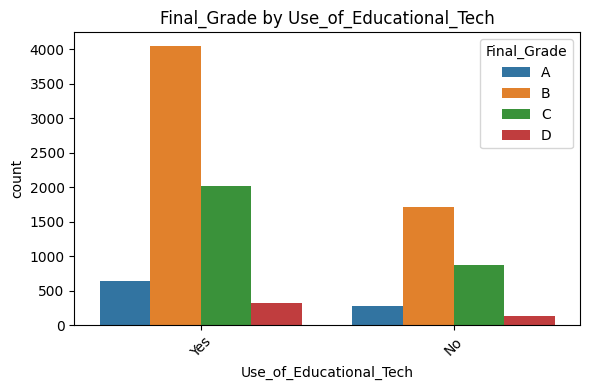

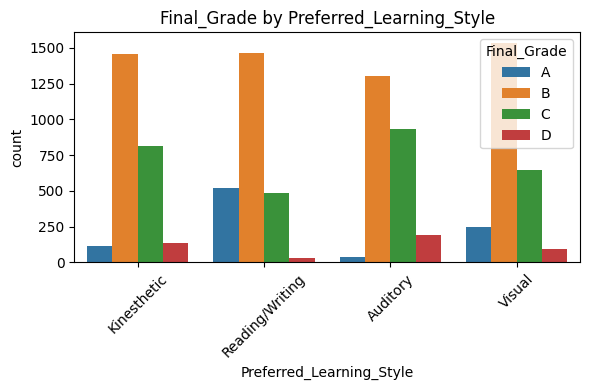

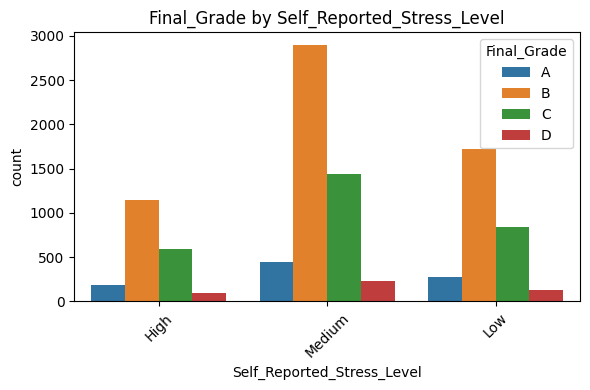

In [145]:
# Define your response variable
response_var = 'Final_Grade'  # categorical
# response_var = 'age'     # for numerical response

# Loop through categorical columns

for cat_var in categorical_cols:
    if cat_var == response_var:
        continue  # skip if same as response variable
    
    plt.figure(figsize=(6, 4))
    sns.countplot(data=cleaned_data, x=cat_var, hue=response_var)
    plt.title(f"{response_var} distribution by {cat_var}")
    plt.title(f"{response_var} by {cat_var}")
    
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    

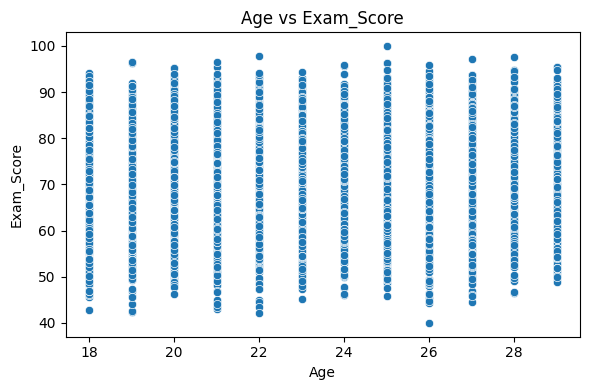

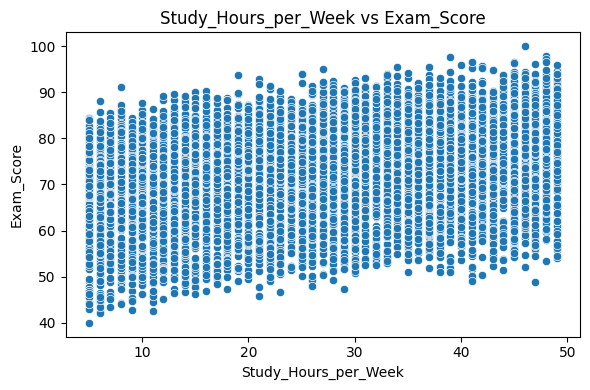

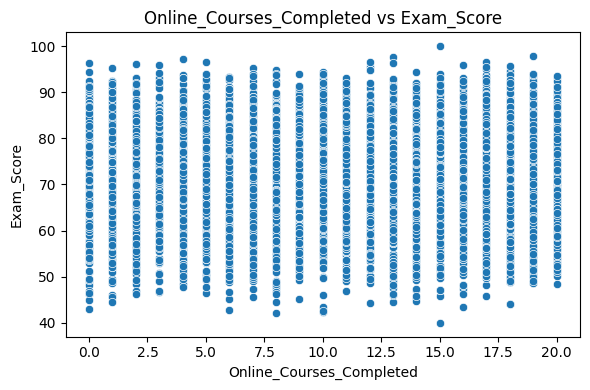

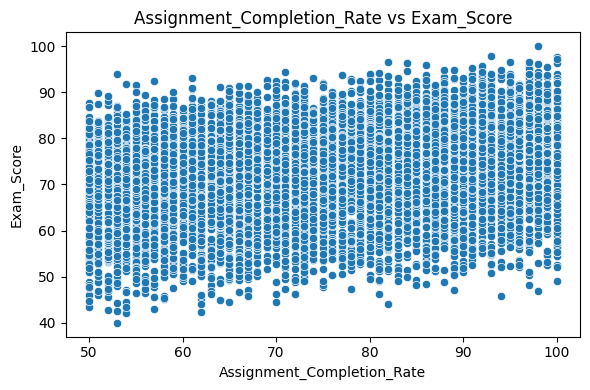

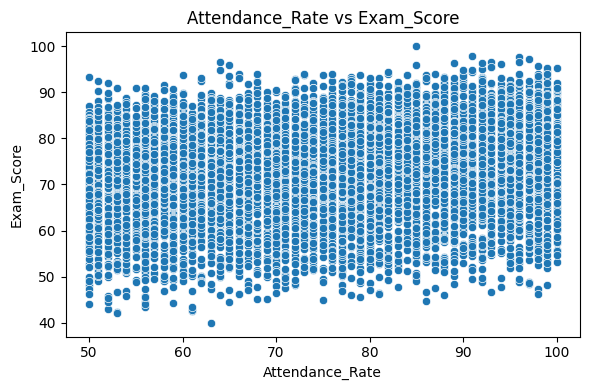

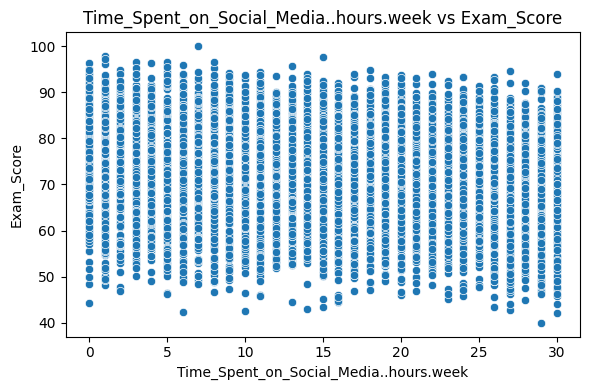

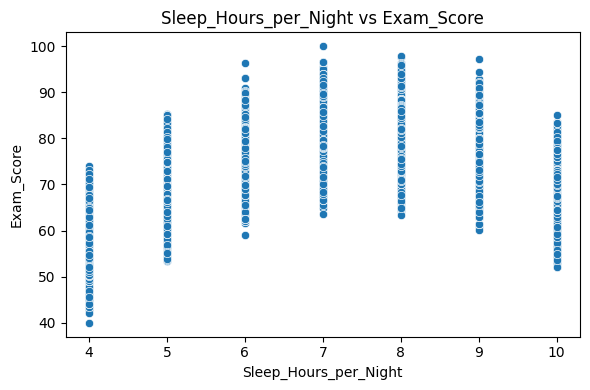

In [146]:

# Define your response variable
response_var = 'Exam_Score'  

for num_var in numeric_data:
    if num_var == response_var:
        continue  # skip if same as response variable
    else:
        plt.figure(figsize=(6, 4))
        if cleaned_data[col].nunique() > 10:
            sns.boxplot(data=cleaned_data, x=num_var, y=response_var)
            plt.title(f"{num_var} vs {response_var}")
        else:
            sns.scatterplot(data=cleaned_data, x=num_var, y=response_var)
            plt.title(f"{num_var} vs {response_var}")
        plt.tight_layout()
        plt.show()


In [147]:
# Step 3: Identify numerical columns (excluding target)
numeric_cols = cleaned_data.select_dtypes(include=['number']).columns.drop("Exam_Score")

# Step 4: Scale only numeric columns
scaler = StandardScaler()
cleaned_data[numeric_cols] = scaler.fit_transform(cleaned_data[numeric_cols])

In [148]:
# Create an ordinal encoding for Final_Grade
grade_mapping = {"A": 1, "B": 2, "C": 3, "D": 4}
cleaned_data["Final_Grade"] = cleaned_data["Final_Grade"].map(grade_mapping)

categorical_cols = [
    'Gender',
    'Participation_in_Discussions',
    'Use_of_Educational_Tech',
    'Preferred_Learning_Style',
    'Self_Reported_Stress_Level'
]

for col in categorical_cols:
    dummies = pd.get_dummies(cleaned_data[col], prefix=col, drop_first=True)
    cleaned_data = pd.concat([cleaned_data.drop(col, axis=1), dummies], axis=1)

cleaned_data.head()

,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate,Exam_Score,Attendance_Rate,Time_Spent_on_Social_Media..hours.week,Sleep_Hours_per_Night,Final_Grade,Gender_Male,Gender_Other,Participation_in_Discussions_Yes,Use_of_Educational_Tech_Yes,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Self_Reported_Stress_Level_Low,Self_Reported_Stress_Level_Medium
0,-1.582639,1.605127,0.650559,1.708927,85.964060,-0.616001,-0.657989,0.511151,1,False,False,True,True,True,False,False,False,False
1,1.594887,0.220714,1.628328,-0.267263,81.584196,-1.226232,1.447930,0.511151,2,False,False,False,True,False,True,False,False,True
2,-1.004907,1.528215,0.161674,-1.016852,84.828407,0.265444,-0.214638,0.010366,2,False,False,False,True,True,False,False,True,False
3,-0.138309,-1.086788,-1.630902,-0.812418,57.502203,-1.022822,1.004579,1.512721,3,False,False,True,True,False,False,False,True,False
4,-1.293773,-0.240757,1.465366,-1.084996,74.638949,1.214692,1.226255,0.511151,2,False,False,True,True,False,False,False,False,True


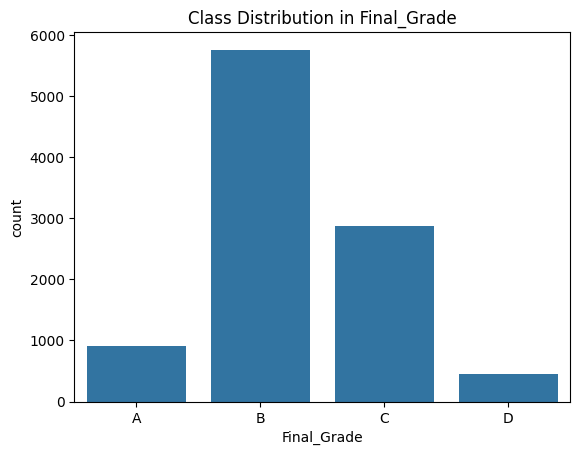

Final_Grade
2    0.5758
3    0.2877
1    0.0916
4    0.0449
Name: proportion, dtype: float64


In [149]:
# Check target distribution

map_alt = {
    1:"A",
    2:"B",
    3:"C",
    4:"D"
}

# Map class names for plotting
y_mapped = pd.Series( cleaned_data['Final_Grade']).map(map_alt)
sns.countplot(x=y_mapped)
plt.title("Class Distribution in Final_Grade")
plt.show()

# Show exact proportions
print(cleaned_data['Final_Grade'].value_counts(normalize=True))


In [150]:
X = cleaned_data.drop(['Final_Grade','Exam_Score'], axis=1)
y = cleaned_data["Final_Grade"]

# Step 2: Identify categorical feature indices (after one-hot encoding, binary columns)
categorical_feature_mask = X.nunique() == 2  # One-hot columns
categorical_indices = [i for i, is_cat in enumerate(categorical_feature_mask) if is_cat]

# Step 3: Apply SMOTENC
smoter = SMOTENC(categorical_features=categorical_indices, random_state=42)
X_bal, y_bal = smoter.fit_resample(X, y)

X_bal_df = pd.DataFrame(X_bal, columns=X.columns)
y_bal_df = pd.Series(y_bal, name="Final_Grade")

# If needed: combined into one DataFrame
cleaned_data = pd.concat([X_bal_df, y_bal_df], axis=1)

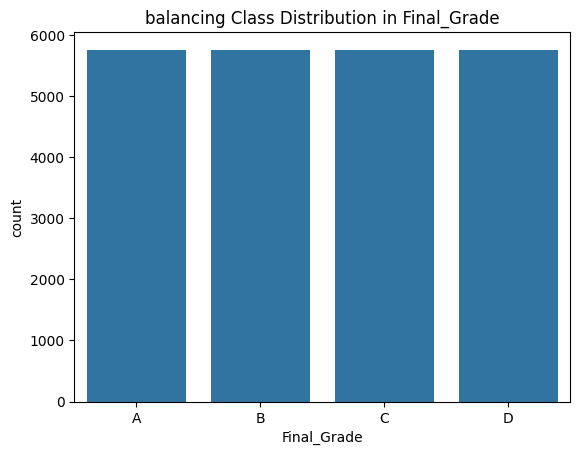

Final_Grade
1    0.25
2    0.25
3    0.25
4    0.25
Name: proportion, dtype: float64


In [151]:
map_alt = {
    1:"A",
    2:"B",
    3:"C",
    4:"D"
}

# Map class names for plotting
y_mapped = pd.Series( cleaned_data['Final_Grade']).map(map_alt)
sns.countplot(x=y_mapped)
plt.title("balancing Class Distribution in Final_Grade")
plt.show()

# Show exact proportions
print( cleaned_data['Final_Grade'].value_counts(normalize=True))

In [152]:

X,y=cleaned_data.drop(columns=['Final_Grade']),cleaned_data['Final_Grade']
X = X.astype(float)
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2,shuffle=True,random_state=42)
# Check the shapes
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)
X_train.head()

Training set size: (18425, 16)
Test set size: (4607, 16)


,Age,Study_Hours_per_Week,Online_Courses_Completed,Assignment_Completion_Rate,Attendance_Rate,Time_Spent_on_Social_Media..hours.week,Sleep_Hours_per_Night,Gender_Male,Gender_Other,Participation_in_Discussions_Yes,Use_of_Educational_Tech_Yes,Preferred_Learning_Style_Kinesthetic,Preferred_Learning_Style_Reading/Writing,Preferred_Learning_Style_Visual,Self_Reported_Stress_Level_Low,Self_Reported_Stress_Level_Medium
7241,-1.582639,-0.548405,-1.142018,0.141604,0.197640,-1.544692,1.512721,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
1071,1.594887,-1.548259,1.139443,0.277893,-0.751608,-1.433854,-0.991204,1.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
7502,-1.582639,1.374392,-1.630902,-1.289430,-0.955018,-0.768827,1.011936,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
5305,1.594887,1.066744,-0.979056,-0.130974,-0.412591,0.228714,-0.991204,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0
19031,-1.518364,0.853024,1.592067,0.792811,-1.474816,0.339694,-1.491988,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [153]:
# Step 1: Define the decition Tree classifier
decisionTree =DecisionTreeClassifier(random_state=42,class_weight='balanced')


# Step 2: Randomized parameter grid using distributions
random_grid = {

    'max_depth': [None,5, 10,15, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],  #Removed 'auto'
}

# Step 3: Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Randomized Search
random_search = RandomizedSearchCV(estimator=decisionTree, param_distributions=random_grid, 
                                   n_iter=50, cv=cv_strategy, n_jobs=-1, random_state=42,return_train_score=True)
random_search.fit(X_train, y_train)

# Step 5: Output
print(f"Best Parameters: {random_search.best_params_}")



Best Parameters: {'max_depth': 30, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 9}


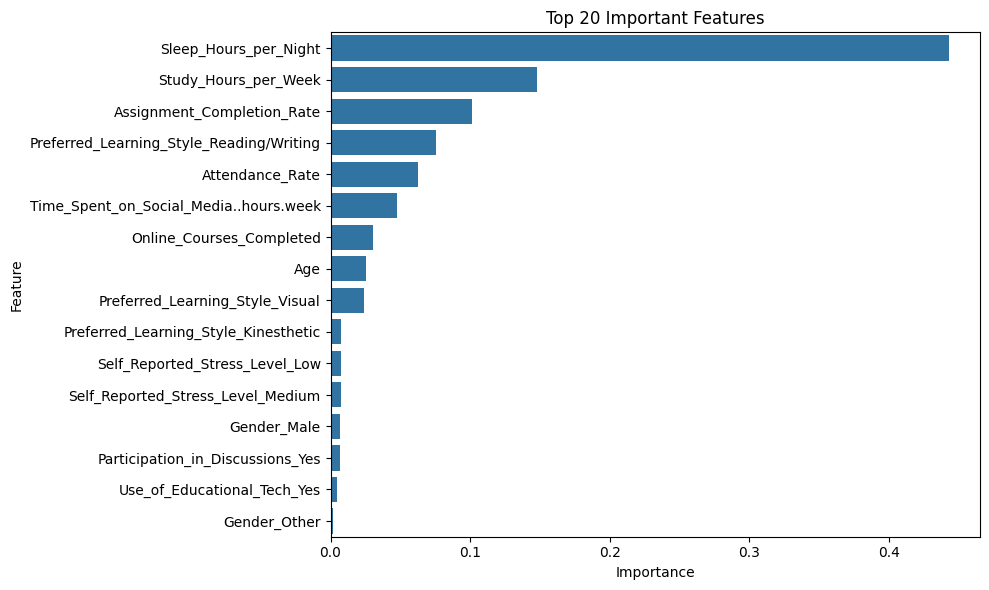

In [154]:
# Get feature importances
best_decisionTree = random_search.best_estimator_
importances = best_decisionTree.feature_importances_
feature_names = X_test.columns
feat_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_df.head(20), x='Importance', y='Feature')
plt.title('Top 20 Important Features')
plt.tight_layout()
plt.show()

In [155]:
important_feats = feat_df[feat_df['Importance'] > 0.01]['Feature'].tolist()
print("Selected features:", important_feats)

Selected features: ['Sleep_Hours_per_Night', 'Study_Hours_per_Week', 'Assignment_Completion_Rate', 'Preferred_Learning_Style_Reading/Writing', 'Attendance_Rate', 'Time_Spent_on_Social_Media..hours.week', 'Online_Courses_Completed', 'Age', 'Preferred_Learning_Style_Visual']


In [156]:
X_filtered = cleaned_data[important_feats]

# Redo train/test split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y, test_size=0.2, shuffle=True, random_state=42)

In [157]:
# Step 1: Define the decition Tree classifier
decisionTree =DecisionTreeClassifier(random_state=42,class_weight='balanced')


# Step 2: Randomized parameter grid using distributions
random_grid = {

    'max_depth': [None,5, 10,15, 20, 30],
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['sqrt', 'log2'],  #Removed 'auto'
}

# Step 3: Cross-validation strategy
cv_strategy = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Step 4: Randomized Search
random_search = RandomizedSearchCV(estimator=decisionTree, param_distributions=random_grid, 
                                   n_iter=50, cv=cv_strategy, n_jobs=-1, random_state=42,return_train_score=True)
random_search.fit(X_train, y_train)

# Step 5: Output
print(f"Best Parameters: {random_search.best_params_}")



Best Parameters: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 3, 'min_samples_split': 4}


 Decision Tree by RandomizedSearchCV
Train Accuracy: 0.9494708276797829
Test Accuracy: 0.8693292815281094
              precision    recall  f1-score   support

           A       0.90      0.88      0.89      1126
           B       0.79      0.80      0.79      1185
           C       0.85      0.84      0.85      1134
           D       0.95      0.96      0.95      1162

    accuracy                           0.87      4607
   macro avg       0.87      0.87      0.87      4607
weighted avg       0.87      0.87      0.87      4607

Confusion Matrix RandomizedSearchCV:
     A    B    C     D
A  990  135    1     0
B  113  948  123     1
C    1  120  957    56
D    0    4   48  1110


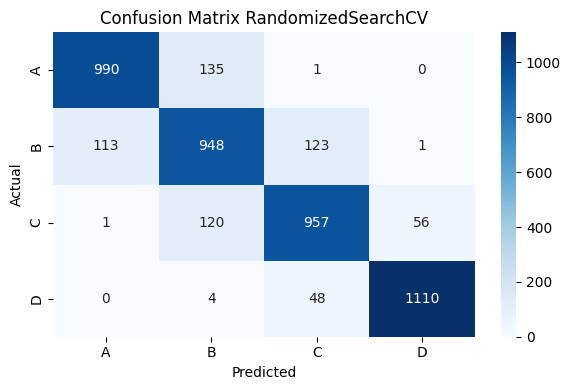

In [158]:
best_decisionTree = random_search.best_estimator_
y_pred = best_decisionTree.predict(X_test)

print(" Decision Tree by RandomizedSearchCV")

print("Train Accuracy:", accuracy_score(y_train, random_search.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred,target_names= ['A', 'B','C','D']))
cm=confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(
        cm,
        index=['A', 'B','C','D'],
        columns=['A', 'B','C','D']
    )
print(f"Confusion Matrix RandomizedSearchCV:\n{cm_df}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['A', 'B','C','D'], 
            yticklabels=['A', 'B','C','D'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix RandomizedSearchCV')
plt.tight_layout()
plt.show()

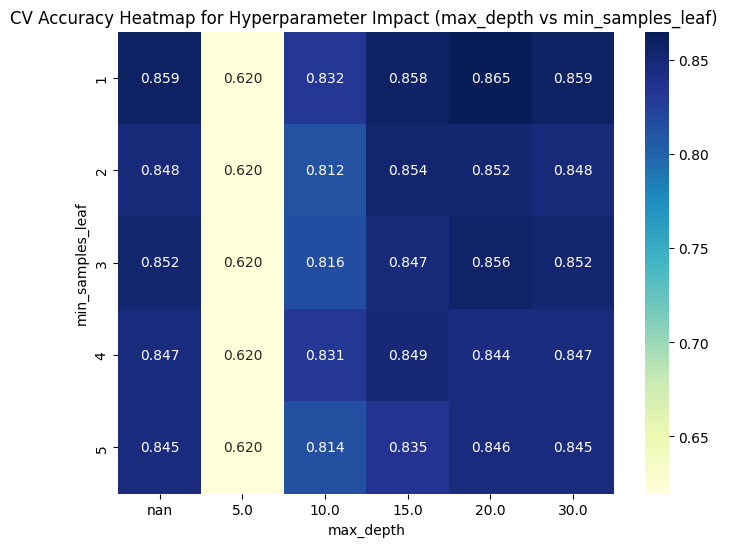

In [159]:
# Grid values
max_depths = [None,5, 10,15, 20, 30]
min_samples_leaves = [1,2,3,4, 5]
fixed_max_features = random_search.best_estimator_.max_features
fixed_min_samples_split = random_search.best_estimator_.min_samples_split

# CV accuracy storage
scores = np.zeros((len(min_samples_leaves), len(max_depths)))

# Manual CV loop
for i, leaf in enumerate(min_samples_leaves):
    for j, depth in enumerate(max_depths):
        clf = DecisionTreeClassifier(
            max_depth=depth,
            min_samples_leaf=leaf,
            min_samples_split=fixed_min_samples_split,
            max_features=fixed_max_features,
            class_weight='balanced',
            random_state=42
        )
        cv_scores = cross_val_score(clf, X_train, y_train, cv=5, scoring='accuracy')
        scores[i, j] = cv_scores.mean()

# Convert to DataFrame for heatmap
df_scores = pd.DataFrame(scores, index=min_samples_leaves, columns=max_depths)

# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df_scores, annot=True, fmt=".3f", cmap="YlGnBu")
plt.title('CV Accuracy Heatmap for Hyperparameter Impact (max_depth vs min_samples_leaf) ')
plt.xlabel('max_depth')
plt.ylabel('min_samples_leaf')
plt.show()


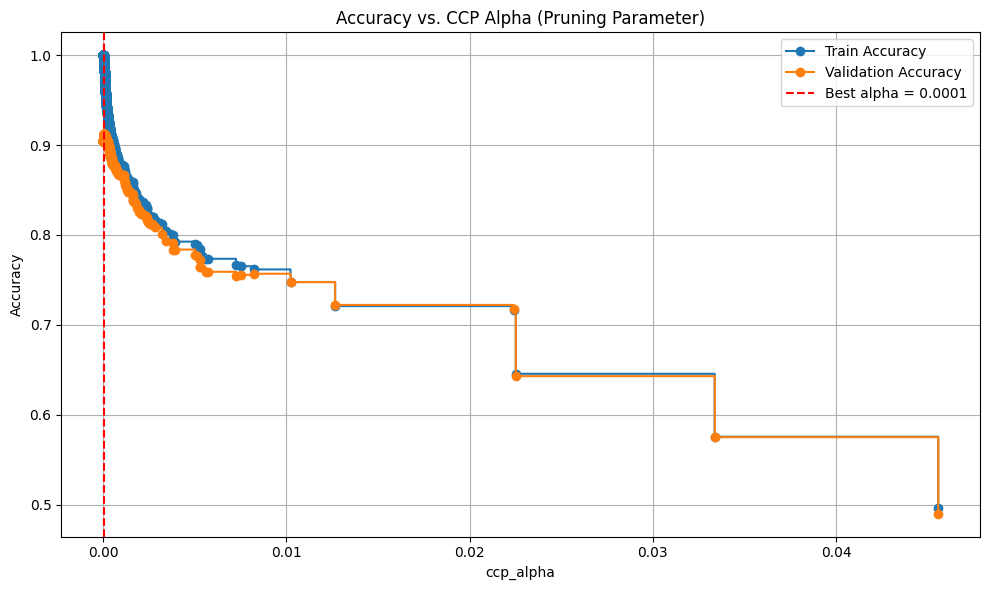

the best cca-alpha parameter for applying  cost-complexity pruning is: 7.015082427218188e-05 


In [160]:

decisionTree =DecisionTreeClassifier(random_state=42,class_weight='balanced')

path = decisionTree.cost_complexity_pruning_path(X_train, y_train)
alphas = path.ccp_alphas
ccp_alphas = path.ccp_alphas[:-1]

train_acc = []
test_acc = []

for alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=alpha,class_weight='balanced')
    clf.fit(X_train, y_train)

    y_train_pred = clf.predict(X_train)
    y_test_pred = clf.predict(X_test)

    train_acc.append(accuracy_score(y_train, y_train_pred))
    test_acc.append(accuracy_score(y_test, y_test_pred))
    best_index = np.argmax(test_acc)
    best_alpha = ccp_alphas[best_index]


plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_acc, marker='o', label='Train Accuracy', drawstyle="steps-post")
plt.plot(ccp_alphas, test_acc, marker='o', label='Validation Accuracy', drawstyle="steps-post")
plt.axvline(x=best_alpha, color='red', linestyle='--', label=f'Best alpha = {best_alpha:.4f}')
plt.xlabel("ccp_alpha")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. CCP Alpha (Pruning Parameter)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print(f'the best cca-alpha parameter for applying  cost-complexity pruning is: {best_alpha} ')


 Decision Tree by CCP_ALPHA Tuning
Train Accuracy: 0.9859430122116689
Test Accuracy: 0.9125244193618407
              precision    recall  f1-score   support

           A       0.94      0.94      0.94      1126
           B       0.87      0.86      0.86      1185
           C       0.88      0.89      0.89      1134
           D       0.96      0.96      0.96      1162

    accuracy                           0.91      4607
   macro avg       0.91      0.91      0.91      4607
weighted avg       0.91      0.91      0.91      4607

Confusion Matrix by CCP_ALPHA Tuning :
      A     B     C     D
A  1056    70     0     0
B    71  1015    99     0
C     0    80  1013    41
D     0     0    42  1120


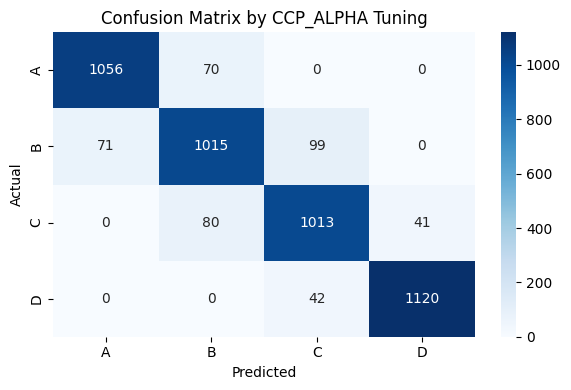

In [161]:
final_tree = DecisionTreeClassifier(
    random_state=42,
    ccp_alpha=best_alpha,
    class_weight='balanced'
)
final_tree.fit(X_train, y_train)

y_pred = final_tree.predict(X_test)

print(" Decision Tree by CCP_ALPHA Tuning")
print("Train Accuracy:", final_tree.score(X_train, y_train))
print("Test Accuracy:", final_tree.score(X_test, y_test))

print(classification_report(y_test, y_pred,target_names= ['A', 'B','C','D']))
cm=confusion_matrix(y_test,y_pred)

cm_df = pd.DataFrame(
        cm,
        index=['A', 'B','C','D'],
        columns=['A', 'B','C','D']
    )
print(f"Confusion Matrix by CCP_ALPHA Tuning :\n{cm_df}")

plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['A', 'B','C','D'], 
            yticklabels=['A', 'B','C','D'])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix by CCP_ALPHA Tuning')
plt.tight_layout()
plt.show()